In [16]:
#import libraries
from sqlalchemy import create_engine
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
engine = create_engine("sqlite:///mta_data.db")
df = pd.read_sql('SELECT * FROM mta_data;', engine)

In [17]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680533 entries, 0 to 3680532
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 308.9+ MB


In [19]:
pd.read_sql('SELECT * FROM mta_data WHERE STATION LIKE "34%" GROUP BY DATE HAVING TIME="03:00:00";', engine)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,02/23/2019,03:00:00,REGULAR,26549429,10971426
1,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,02/24/2019,03:00:00,REGULAR,26552797,10973096
2,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,02/25/2019,03:00:00,REGULAR,26555019,10974295
3,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,02/26/2019,03:00:00,REGULAR,26560171,10976720
4,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,02/27/2019,03:00:00,REGULAR,26565253,10979241
5,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,02/28/2019,03:00:00,REGULAR,26570218,10981800
6,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,03/01/2019,03:00:00,REGULAR,26575521,10984393
7,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,03/02/2019,03:00:00,REGULAR,26580442,10986996
8,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,03/03/2019,03:00:00,REGULAR,26583497,10988433
9,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,03/04/2019,03:00:00,REGULAR,26585815,10989559


In [20]:
def preprocess(df):
    
    
    # Standardize column name  if there are any extra spaces etc
    df.columns = df.columns.str.strip()
        
    #since it is a string , concat the date and time and then change the type into datetime and add to df
    df['DATETIME']= pd.to_datetime(df['DATE'] + ' ' + df['TIME'],format= '%m/%d/%Y %H:%M:%S')
    
    # Create Day of the Week column from 'DATETIME'
    df['DAY'] = df['DATETIME'].dt.day_name()
    #df['DATEINDEX']=df['DATETIME'].dt.weekday

    return df

In [ ]:
df= preprocess(df)
df

In [22]:
df['DATETIME'].dt.month.value_counts()

5    908934
3    899650
4    874066
6    823385
2    174498
Name: DATETIME, dtype: int64

In [23]:
df['DATETIME'].dt.year.value_counts()

2019    3680533
Name: DATETIME, dtype: int64

In [24]:
#check for null values
df.isna().sum()

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
DATETIME    0
DAY         0
dtype: int64

In [25]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(df
    .groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"])
    .ENTRIES.count()
    .reset_index()
    .sort_values("ENTRIES", ascending=False)).head(10)

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
1798802,N519,R461,00-03-01,B'WAY-LAFAYETTE,2019-03-25 01:00:00,2
2638270,R188,R037,00-00-01,207 ST,2019-02-28 07:00:00,2
971124,N071,R013,00-00-04,34 ST-PENN STA,2019-02-27 19:00:00,2
868162,N045,R187,01-06-00,81 ST-MUSEUM,2019-06-11 21:00:00,2
868107,N045,R187,01-06-00,81 ST-MUSEUM,2019-06-02 17:00:00,2
970361,N071,R013,00-00-03,34 ST-PENN STA,2019-02-28 07:00:00,2
90050,A034,R170,03-03-00,14 ST-UNION SQ,2019-03-12 17:00:00,2
970359,N071,R013,00-00-03,34 ST-PENN STA,2019-02-28 03:00:00,2
970358,N071,R013,00-00-03,34 ST-PENN STA,2019-02-27 23:00:00,2
970357,N071,R013,00-00-03,34 ST-PENN STA,2019-02-27 19:00:00,2


#### There seems to be double values . First lets check the desc values since there are irregularities there.

In [26]:
df.DESC.value_counts()

REGULAR       3664589
RECOVR AUD      15944
Name: DESC, dtype: int64

In [27]:
df = pd.read_sql('SELECT * FROM mta_data WHERE DESC != "RECOVR AUD" ;', engine)

In [28]:
#Looks to be a incorrect AUD entry.so keep only the regular value DESC
df.DESC.value_counts()

REGULAR    3664589
Name: DESC, dtype: int64

In [31]:
df= preprocess(df)

In [33]:
#rid of dup entries
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATETIME"], 
                          inplace=True, ascending=False)
print("prior shape: ", df.shape)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True);
print("post shape: ", df.shape)

prior shape:  (3664589, 13)
post shape:  (3664589, 13)


#### looking at the mask example above we can see that the count is decreasing instead of increasing so to deal witht hat we first take the turnstile day count by getting the last count for each day 

In [34]:
#daily eantries adn exits for each unique turnstile
turnstiles_daily = (df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False).ENTRIES.first( ))
turnstiles_daily_exits = (df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False).EXITS.first( ))

In [35]:
#turnstiles_daily.head()

In [36]:
#turnstiles_daily_exits.head()

In [37]:
#daily entrya and exit count for each turnstile by negating from previous days total count
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                            .groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]]
                                            .shift(1))
turnstiles_daily_exits[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_exits
                                            .groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "EXITS"]]
                                            .shift(1))

In [38]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,02/23/2019,6956147,NaN,NaN
1,A002,R051,02-00-00,59 ST,02/24/2019,6956566,02/23/2019,6956147.0
2,A002,R051,02-00-00,59 ST,02/25/2019,6957918,02/24/2019,6956566.0
3,A002,R051,02-00-00,59 ST,02/26/2019,6959076,02/25/2019,6957918.0
4,A002,R051,02-00-00,59 ST,02/27/2019,6960662,02/26/2019,6959076.0


In [39]:
turnstiles_daily_exits.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
0,A002,R051,02-00-00,59 ST,02/23/2019,2359325,NaN,NaN
1,A002,R051,02-00-00,59 ST,02/24/2019,2359492,02/23/2019,2359325.0
2,A002,R051,02-00-00,59 ST,02/25/2019,2360018,02/24/2019,2359492.0
3,A002,R051,02-00-00,59 ST,02/26/2019,2360530,02/25/2019,2360018.0
4,A002,R051,02-00-00,59 ST,02/27/2019,2361128,02/26/2019,2360530.0


In [40]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
turnstiles_daily_exits.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [41]:
#check 
(turnstiles_daily["ENTRIES"] - turnstiles_daily["PREV_ENTRIES"]).describe()

count    6.042460e+05
mean     1.365641e+04
std      9.519367e+06
min     -2.071639e+09
25%      2.440000e+02
50%      7.850000e+02
75%      1.550000e+03
max      2.088504e+09
dtype: float64

In [42]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].shape

(6367, 8)

In [43]:
turnstiles_daily_exits[turnstiles_daily_exits["EXITS"] < turnstiles_daily_exits["PREV_EXITS"]].shape

(5230, 8)

In [44]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
9913,A025,R023,01-03-01,34 ST-HERALD SQ,02/24/2019,1238696217,02/23/2019,1.238698e+09
9914,A025,R023,01-03-01,34 ST-HERALD SQ,02/25/2019,1238692519,02/24/2019,1.238696e+09
9915,A025,R023,01-03-01,34 ST-HERALD SQ,02/26/2019,1238688600,02/25/2019,1.238693e+09
9916,A025,R023,01-03-01,34 ST-HERALD SQ,02/27/2019,1238684424,02/26/2019,1.238689e+09
9917,A025,R023,01-03-01,34 ST-HERALD SQ,02/28/2019,1238680403,02/27/2019,1.238684e+09


In [45]:
turnstiles_daily[turnstiles_daily["STATION"]=="34 ST-PENN STA"]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
155775,N067,R012,00-00-00,34 ST-PENN STA,02/24/2019,2194623,02/23/2019,2194344.0
155776,N067,R012,00-00-00,34 ST-PENN STA,02/25/2019,2195336,02/24/2019,2194623.0
155777,N067,R012,00-00-00,34 ST-PENN STA,02/26/2019,2196076,02/25/2019,2195336.0
155778,N067,R012,00-00-00,34 ST-PENN STA,02/27/2019,2196542,02/26/2019,2196076.0
155779,N067,R012,00-00-00,34 ST-PENN STA,02/28/2019,2197212,02/27/2019,2196542.0
...,...,...,...,...,...,...,...,...
408622,R142,R293,01-06-01,34 ST-PENN STA,06/24/2019,67880474,06/23/2019,67879851.0
408623,R142,R293,01-06-01,34 ST-PENN STA,06/25/2019,67880962,06/24/2019,67880474.0
408624,R142,R293,01-06-01,34 ST-PENN STA,06/26/2019,67881672,06/25/2019,67880962.0
408625,R142,R293,01-06-01,34 ST-PENN STA,06/27/2019,67882354,06/26/2019,67881672.0


In [46]:
#check a specific example
mask = (turnstiles_daily['STATION'] == '34 ST-HERALD SQ') & (turnstiles_daily['C/A'] == 'A025') & (turnstiles_daily['SCP'] == '01-03-01')
turnstiles_daily[mask].head(10) 

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
9913,A025,R023,01-03-01,34 ST-HERALD SQ,02/24/2019,1238696217,02/23/2019,1.238698e+09
9914,A025,R023,01-03-01,34 ST-HERALD SQ,02/25/2019,1238692519,02/24/2019,1.238696e+09
9915,A025,R023,01-03-01,34 ST-HERALD SQ,02/26/2019,1238688600,02/25/2019,1.238693e+09
9916,A025,R023,01-03-01,34 ST-HERALD SQ,02/27/2019,1238684424,02/26/2019,1.238689e+09
9917,A025,R023,01-03-01,34 ST-HERALD SQ,02/28/2019,1238680403,02/27/2019,1.238684e+09
9918,A025,R023,01-03-01,34 ST-HERALD SQ,03/01/2019,1238676254,02/28/2019,1.238680e+09
9919,A025,R023,01-03-01,34 ST-HERALD SQ,03/02/2019,1238673563,03/01/2019,1.238676e+09
9920,A025,R023,01-03-01,34 ST-HERALD SQ,03/03/2019,1238671275,03/02/2019,1.238674e+09
9921,A025,R023,01-03-01,34 ST-HERALD SQ,03/04/2019,1238667889,03/03/2019,1.238671e+09
9922,A025,R023,01-03-01,34 ST-HERALD SQ,03/05/2019,1238663515,03/04/2019,1.238668e+09


#### There are negative calues and really high count for the entries and exits.and looking at an exaple they are working in reverse which is not logical, therefore to best compensate for the mistake  we make the value positive when a count is negative and if the count is too high we set a logical upper bound for how many people can go through a given turnstile given the timeframe of each reading. 

In [47]:
def daily_count_entrance(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(daily_count_entrance, axis=1, max_counter=100000);

entries: 1279 <-- 5664363.0
entries: 1261 <-- 3875856.0
entries: 962 <-- 2117561.0
entries: 235208427 <-- 68073706.0
entries: 617 <-- 3124306.0
entries: 1376864 <-- 4960567.0
entries: 460397 <-- 294513.0
entries: 525061 <-- 644203.0
entries: 644 <-- 2234841.0
entries: 182 <-- 111625.0
entries: 458941 <-- 950058.0
entries: 1034 <-- 127369.0
entries: 512 <-- 67586631.0
entries: 3418 <-- 221540.0
entries: 62 <-- 185793.0
entries: 1376283 <-- 8703.0
entries: 1800 <-- 9913754.0
entries: 1808 <-- 3596117.0
entries: 44 <-- 162125.0
entries: 142 <-- 1087600.0
entries: 419 <-- 1094836.0
entries: 371 <-- 4317056.0
entries: 139 <-- 3803351.0
entries: 478 <-- 167184.0
entries: 427 <-- 401305.0
entries: 1790 <-- 13967417.0
entries: 1442 <-- 292940.0
entries: 458914 <-- 820296.0
entries: 787212 <-- 588723.0
entries: 761 <-- 1164049.0
entries: 221 <-- 7246254.0
entries: 4050923 <-- 5903657.0
entries: 524600 <-- 5852867.0
entries: 592067 <-- 57022593.0
entries: 41 <-- 1972969.0
entries: 86 <-- 1130846

entries: 81 <-- 195766.0
entries: 97 <-- 540908.0
entries: 172 <-- 428500.0
entries: 0 <-- 469655.0
entries: 71 <-- 160029.0
entries: 687 <-- 499862.0
entries: 146 <-- 400468.0
entries: 106 <-- 216910.0
entries: 107 <-- 259856.0
entries: 156 <-- 224739.0
entries: 325 <-- 208251.0
entries: 4 <-- 199301.0
entries: 4 <-- 195275.0
entries: 23 <-- 161623.0
entries: 191 <-- 112863.0
entries: 103 <-- 535011.0
entries: 101 <-- 108599.0
entries: 69 <-- 207654.0
entries: 128 <-- 338860.0
entries: 69 <-- 101520.0
entries: 18 <-- 267530.0
entries: 96951 <-- 258946.0
entries: 1 <-- 122262.0
entries: 1 <-- 131639.0
entries: 1033 <-- 133581.0
entries: 989 <-- 261206.0
entries: 110 <-- 111323.0
entries: 1989 <-- 191972.0
entries: 2027 <-- 116890.0
entries: 0 <-- 121772.0
entries: 734 <-- 128980.0
entries: 1770 <-- 223657.0
entries: 1966 <-- 169528.0
entries: 140 <-- 233490.0
entries: 2334 <-- 304022.0
entries: 1598 <-- 139778.0
entries: 1919 <-- 393456.0
entries: 730 <-- 182024.0
entries: 231 <-- 2560

In [48]:
def daily_count_exits(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
        print(f'exits: {row["EXITS"]} <-- {row["PREV_EXITS"]}')
        counter = min(row["EXITS"], row["PREV_EXITS"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

turnstiles_daily_exits["DAILY_EXITS"] =turnstiles_daily_exits.apply(daily_count_exits, axis=1, max_counter=100000);

exits: 300 <-- 2793752.0
exits: 1484 <-- 4532563.0
exits: 3015 <-- 5334419.0
exits: 100777537 <-- 17234616.0
exits: 151 <-- 1662547.0
exits: 266 <-- 1246042.0
exits: 1060 <-- 3312052.0
exits: 269 <-- 323760.0
exits: 2 <-- 561503.0
exits: 575 <-- 166944.0
exits: 83 <-- 16847953.0
exits: 75 <-- 170270.0
exits: 262193 <-- 16091.0
exits: 62 <-- 302427.0
exits: 34 <-- 4673392.0
exits: 155 <-- 2614707.0
exits: 737 <-- 1258061.0
exits: 416 <-- 396303.0
exits: 134 <-- 738885.0
exits: 155 <-- 3778932.0
exits: 168 <-- 156975.0
exits: 959 <-- 14611990.0
exits: 157 <-- 102272.0
exits: 178 <-- 222378.0
exits: 613 <-- 6668706.0
exits: 1779255 <-- 4759780.0
exits: 37 <-- 5978855.0
exits: 701 <-- 19884031.0
exits: 422 <-- 5343222.0
exits: 592 <-- 2530208.0
exits: 552 <-- 4238790.0
exits: 188 <-- 1236978.0
exits: 81 <-- 703201.0
exits: 22 <-- 313208.0
exits: 1030 <-- 7550494.0
exits: 871 <-- 4033191.0
exits: 187 <-- 1053223.0
exits: 136 <-- 276368.0
exits: 229 <-- 195057.0
exits: 588 <-- 121150.0
exits

exits: 189 <-- 139920.0
exits: 367 <-- 2009199.0
exits: 419452313 <-- 1657539.0
exits: 192 <-- 419454116.0
exits: 32 <-- 50785604.0
exits: 7 <-- 3651572.0
exits: 55 <-- 17065751.0
exits: 613 <-- 4863714.0
exits: 775 <-- 736048.0
exits: 3903 <-- 12323289.0
exits: 13 <-- 2090245.0
exits: 926 <-- 1876424.0
exits: 258 <-- 89243255.0
exits: 615 <-- 566353.0
exits: 691 <-- 2373066.0
exits: 6 <-- 12407647.0
exits: 334 <-- 10391886.0
exits: 262710 <-- 51050907.0
exits: 614 <-- 106520.0
exits: 386073845 <-- 340.0
exits: 895 <-- 386167715.0
exits: 5117 <-- 15975242.0
exits: 791 <-- 206065.0
exits: 1665 <-- 331740.0
exits: 2235 <-- 2658987.0
exits: 18 <-- 2868860.0
exits: 503 <-- 5739262.0
exits: 1276 <-- 837537794.0
exits: 298 <-- 1412860.0
exits: 273 <-- 18409164.0
exits: 137 <-- 7207217.0
exits: 299 <-- 945034.0
exits: 65572 <-- 900047.0
exits: 18 <-- 4208623.0
exits: 408 <-- 162713.0
exits: 1137 <-- 3636115.0
exits: 17 <-- 4603007.0
exits: 3 <-- 137154.0
exits: 16 <-- 1541021.0
exits: 7 <-- 1

In [49]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,02/24/2019,6956566,02/23/2019,6956147.0,419.0
2,A002,R051,02-00-00,59 ST,02/25/2019,6957918,02/24/2019,6956566.0,1352.0
3,A002,R051,02-00-00,59 ST,02/26/2019,6959076,02/25/2019,6957918.0,1158.0
4,A002,R051,02-00-00,59 ST,02/27/2019,6960662,02/26/2019,6959076.0,1586.0
5,A002,R051,02-00-00,59 ST,02/28/2019,6962053,02/27/2019,6960662.0,1391.0


In [50]:
turnstiles_daily_exits.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,02/24/2019,2359492,02/23/2019,2359325.0,167.0
2,A002,R051,02-00-00,59 ST,02/25/2019,2360018,02/24/2019,2359492.0,526.0
3,A002,R051,02-00-00,59 ST,02/26/2019,2360530,02/25/2019,2360018.0,512.0
4,A002,R051,02-00-00,59 ST,02/27/2019,2361128,02/26/2019,2360530.0,598.0
5,A002,R051,02-00-00,59 ST,02/28/2019,2361664,02/27/2019,2361128.0,536.0


In [51]:
turnstiles_daily.describe() # with time

,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
count,6.042460e+05,6.042460e+05,604246.000000
mean,4.108540e+07,4.107174e+07,1074.302239
std,2.106411e+08,2.106013e+08,1482.560215
min,0.000000e+00,0.000000e+00,0.000000
25%,3.394432e+05,3.406480e+05,265.000000
50%,2.170491e+06,2.172414e+06,804.000000
75%,6.740185e+06,6.740366e+06,1574.000000
max,2.129457e+09,2.129458e+09,99708.000000


In [52]:
turnstiles_daily.describe() #no time 

,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
count,6.042460e+05,6.042460e+05,604246.000000
mean,4.108540e+07,4.107174e+07,1074.302239
std,2.106411e+08,2.106013e+08,1482.560215
min,0.000000e+00,0.000000e+00,0.000000
25%,3.394432e+05,3.406480e+05,265.000000
50%,2.170491e+06,2.172414e+06,804.000000
75%,6.740185e+06,6.740366e+06,1574.000000
max,2.129457e+09,2.129458e+09,99708.000000


In [53]:
turnstiles_daily_exits.describe()

,EXITS,PREV_EXITS,DAILY_EXITS
count,6.042460e+05,6.042460e+05,604246.000000
mean,3.365303e+07,3.364541e+07,853.150905
std,1.943410e+08,1.943204e+08,1476.368418
min,0.000000e+00,0.000000e+00,0.000000
25%,1.386135e+05,1.390140e+05,158.000000
50%,1.252630e+06,1.253996e+06,517.000000
75%,4.591565e+06,4.592094e+06,1147.000000
max,2.124280e+09,2.124282e+09,99385.000000


In [54]:
turnstiles_daily['DAILY_EXITS']=turnstiles_daily_exits['DAILY_EXITS']
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,02/24/2019,6956566,02/23/2019,6956147.0,419.0,167.0
2,A002,R051,02-00-00,59 ST,02/25/2019,6957918,02/24/2019,6956566.0,1352.0,526.0
3,A002,R051,02-00-00,59 ST,02/26/2019,6959076,02/25/2019,6957918.0,1158.0,512.0
4,A002,R051,02-00-00,59 ST,02/27/2019,6960662,02/26/2019,6959076.0,1586.0,598.0
5,A002,R051,02-00-00,59 ST,02/28/2019,6962053,02/27/2019,6960662.0,1391.0,536.0
...,...,...,...,...,...,...,...,...,...,...
609168,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/24/2019,5554,06/23/2019,5554.0,0.0,0.0
609169,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/25/2019,5554,06/24/2019,5554.0,0.0,0.0
609170,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/26/2019,5554,06/25/2019,5554.0,0.0,0.0
609171,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/27/2019,5554,06/26/2019,5554.0,0.0,0.0


In [55]:
turnstiles_daily['TRAFFIC'] = turnstiles_daily['DAILY_ENTRIES'] + turnstiles_daily['DAILY_EXITS']

In [56]:
#DAILY count for clusters (ControlArea/Unit/Station)
cluster_daily = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['TRAFFIC']].sum().reset_index()
cluster_daily

,C/A,UNIT,STATION,DATE,TRAFFIC
0,A002,R051,59 ST,02/24/2019,7662.0
1,A002,R051,59 ST,02/25/2019,19885.0
2,A002,R051,59 ST,02/26/2019,17814.0
3,A002,R051,59 ST,02/27/2019,23868.0
4,A002,R051,59 ST,02/28/2019,21431.0
...,...,...,...,...,...
92719,TRAM2,R469,RIT-ROOSEVELT,06/24/2019,3703.0
92720,TRAM2,R469,RIT-ROOSEVELT,06/25/2019,2855.0
92721,TRAM2,R469,RIT-ROOSEVELT,06/26/2019,3839.0
92722,TRAM2,R469,RIT-ROOSEVELT,06/27/2019,3483.0


In [58]:
#daily toal traffic for each 
station_daily = cluster_daily.groupby(["STATION", "DATE"])[['TRAFFIC']].sum().reset_index()
station_daily

,STATION,DATE,TRAFFIC
0,1 AV,02/24/2019,65.0
1,1 AV,02/25/2019,39116.0
2,1 AV,02/26/2019,41964.0
3,1 AV,02/27/2019,42795.0
4,1 AV,02/28/2019,43508.0
...,...,...,...
47124,ZEREGA AV,06/24/2019,5236.0
47125,ZEREGA AV,06/25/2019,5128.0
47126,ZEREGA AV,06/26/2019,5590.0
47127,ZEREGA AV,06/27/2019,5203.0


In [59]:
station_daily.to_csv("sation_Daily.csv")

In [60]:
station_daily[station_daily.STATION == '34 ST-PENN STA']

,STATION,DATE,TRAFFIC
7616,34 ST-PENN STA,02/24/2019,128488.0
7617,34 ST-PENN STA,02/25/2019,317653.0
7618,34 ST-PENN STA,02/26/2019,337178.0
7619,34 ST-PENN STA,02/27/2019,246390.0
7620,34 ST-PENN STA,02/28/2019,375221.0
...,...,...,...
7736,34 ST-PENN STA,06/24/2019,320471.0
7737,34 ST-PENN STA,06/25/2019,334493.0
7738,34 ST-PENN STA,06/26/2019,333722.0
7739,34 ST-PENN STA,06/27/2019,342566.0


In [61]:
station_totals = station_daily.groupby('STATION')['TRAFFIC'].sum().reset_index().sort_values('TRAFFIC',ascending=False)
station_totals.head(10)


,STATION,TRAFFIC
61,34 ST-PENN STA,36298594.0
233,GRD CNTRL-42 ST,31090327.0
59,34 ST-HERALD SQ,26458959.0
46,23 ST,22474238.0
14,14 ST-UNION SQ,22127794.0
353,TIMES SQ-42 ST,22120187.0
68,42 ST-PORT AUTH,20976675.0
226,FULTON ST,19231122.0
110,86 ST,18175543.0
9,125 ST,16150555.0


<BarContainer object of 10 artists>

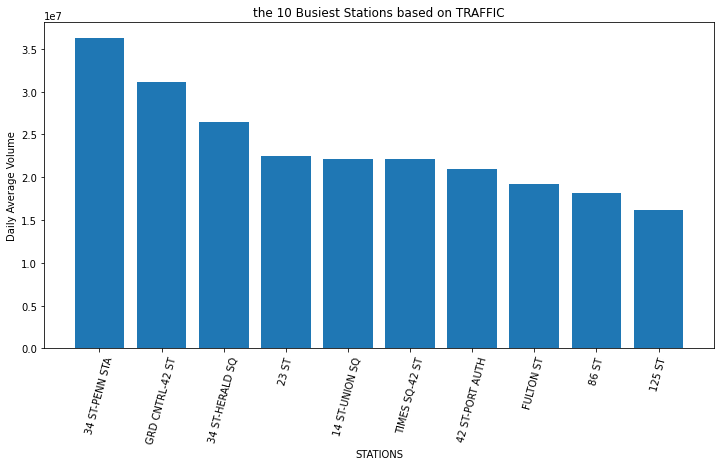

In [62]:
x=station_totals['STATION'].head(10)
y=station_totals['TRAFFIC'].head(10)
plt.figure(figsize=[12,6])
plt.xlabel('STATIONS')
plt.xticks(rotation=75)
plt.ylabel('Daily Average Volume')
plt.title('the 10 Busiest Stations based on TRAFFIC')
plt.bar(x,y)


In [63]:
turnstiles_daily['DAY'] =pd.to_datetime(turnstiles_daily['DATE']).dt.day_name()
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
turnstiles_daily['DAY'] =pd.Categorical(turnstiles_daily.DAY, categories=days, ordered=True)
dow_mean = turnstiles_daily.groupby(['STATION','DAY'])[['TRAFFIC']].mean().reset_index().sort_values('DAY',ascending=False)
#dow_mean

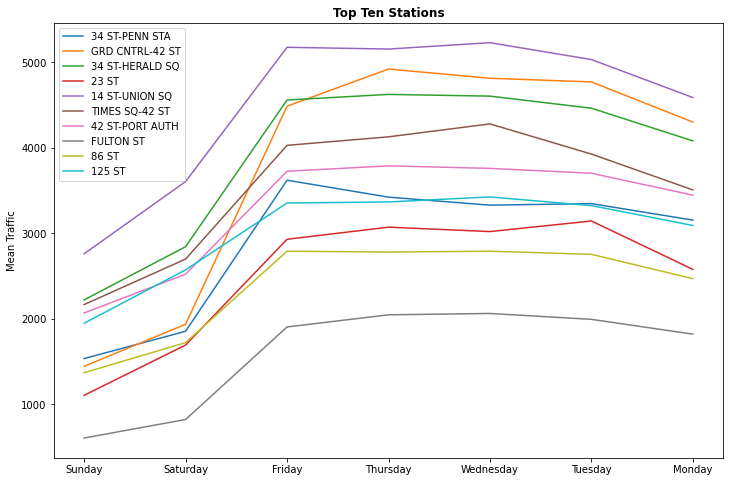

In [64]:
top_station = list(station_totals['STATION'].head(10))
fig, ax = plt.subplots(figsize=[12,8])

for s in top_station:
    tmp_df = dow_mean[dow_mean['STATION'] == s]
    xs = tmp_df['DAY']
    plt.plot(xs, tmp_df['TRAFFIC'], label=s)

plt.xticks(np.arange(7))
plt.legend()
plt.ylabel('Mean Traffic')
plt.title('Top Ten Stations',fontweight="bold");

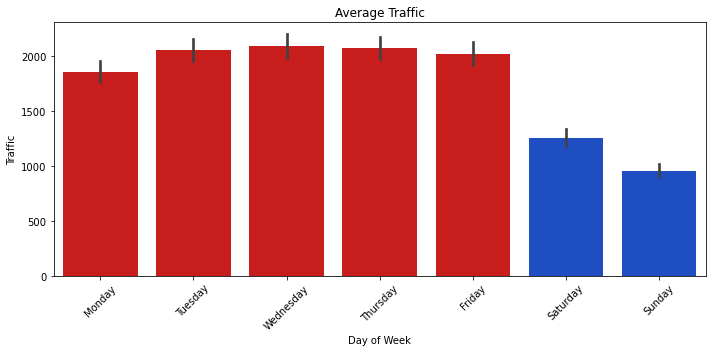

In [65]:
fig, axs = plt.subplots(nrows=1,figsize=(10,5))

with sns.xkcd_palette(['red', 'red', 'red', 'red', 'red', 'blue', 'blue']):
    sns.barplot(data =dow_mean, x='DAY', y='TRAFFIC', ax=axs, label="Traffic").set(title='Average Traffic', xlabel='Day of Week', ylabel='Traffic');

axs = plt.gca()
plt.xticks(rotation=45)
plt.tight_layout()

## This portion is just to plot the 4hr interval graph from the main df

entries: 2501642 <-- 1129054485.0
entries: 8123329 <-- 2063648840.0
entries: 6861700 <-- 3769.0
entries: 10463114 <-- 84.0
entries: 6721101 <-- 47.0
entries: 10993219 <-- 142.0
entries: 1488298 <-- 6.0
entries: 1526472 <-- 59.0
entries: 67610363 <-- 589889.0
entries: 1905727 <-- 13257.0
entries: 2876591 <-- 5.0
entries: 1848584 <-- 16.0
entries: 13653626 <-- 12.0
entries: 868286381 <-- 458854.0
entries: 101740358 <-- 868286442.0
entries: 12064801 <-- 11.0
entries: 5176463 <-- 3.0
entries: 1081620 <-- 151.0
entries: 740844 <-- 184609880.0
entries: 1933614 <-- 2013307344.0
entries: 2740067 <-- 0.0
entries: 402692234 <-- 589928.0
entries: 1605956 <-- 402692234.0
entries: 1430820 <-- 17.0
entries: 3558247 <-- 905996203.0
entries: 458752 <-- 683737068.0
entries: 3000575 <-- 20.0
entries: 12737464 <-- 426.0
entries: 7480484 <-- 119.0
entries: 2758772 <-- 704681341.0
entries: 1258666495 <-- 88839683.0
entries: 1942742623 <-- 881623600.0
entries: 438498743 <-- 244.0
entries: 1830432 <-- 452993

entries: 2117780 <-- 2.0
entries: 3876009 <-- 151.0
entries: 5664363 <-- 836.0
entries: 5196016 <-- 14656605.0
entries: 14655214 <-- 5196016.0
entries: 67604768 <-- 10757180.0
entries: 10755609 <-- 67604768.0
entries: 26637117 <-- 12428476.0
entries: 12425908 <-- 26637117.0
entries: 26594498 <-- 4400722.0
entries: 4399580 <-- 26594498.0
exits: 432 <-- 1078346838.0
exits: 690084 <-- 167819158.0
exits: 5240692 <-- 2168.0
exits: 5317691 <-- 72.0
exits: 8409024 <-- 35.0
exits: 12352528 <-- 122.0
exits: 253440 <-- 20.0
exits: 656920 <-- 41.0
exits: 17019461 <-- 54.0
exits: 1704074 <-- 388.0
exits: 11060154 <-- 25.0
exits: 8241259 <-- 558.0
exits: 8665111 <-- 5.0
exits: 185898 <-- 177.0
exits: 174324650 <-- 122.0
exits: 3054827 <-- 174325682.0
exits: 1748976 <-- 1960317.0
exits: 10598788 <-- 1.0
exits: 2249790 <-- 33.0
exits: 3649507 <-- 494.0
exits: 1030141 <-- 251723191.0
exits: 3865521 <-- 838917691.0
exits: 11745038 <-- 281.0
exits: 67116251 <-- 25.0
exits: 291844 <-- 67116193.0
exits: 1

exits: 161514 <-- 71.0
exits: 285563 <-- 172.0
exits: 495414 <-- 419.0
exits: 1101959 <-- 0.0
exits: 116163 <-- 531.0
exits: 286409 <-- 0.0
exits: 2846892 <-- 106.0
exits: 1911650 <-- 109.0
exits: 334108 <-- 80.0
exits: 1349684 <-- 32.0
exits: 292353 <-- 69.0
exits: 102972 <-- 11.0
exits: 157926 <-- 34.0
exits: 125478 <-- 59.0
exits: 124383 <-- 46.0
exits: 118589 <-- 117.0
exits: 796646 <-- 178.0
exits: 461570 <-- 150.0
exits: 199401 <-- 191.0
exits: 1168621 <-- 94.0
exits: 800563 <-- 67.0
exits: 128801 <-- 37.0
exits: 386714 <-- 0.0
exits: 108997 <-- 0.0
exits: 166052 <-- 16.0
exits: 330545 <-- 17.0
exits: 194564 <-- 8.0
exits: 505449 <-- 5.0
exits: 136304 <-- 30.0
exits: 122449 <-- 0.0
exits: 230268 <-- 40.0
exits: 195494 <-- 0.0
exits: 152492 <-- 402.0
exits: 213065 <-- 75.0
exits: 307019 <-- 0.0
exits: 241243 <-- 396.0
exits: 5422024 <-- 63.0
exits: 312093 <-- 45.0
exits: 995718 <-- 210.0
exits: 1607958 <-- 0.0
exits: 150397 <-- 13.0
exits: 133159 <-- 30.0
exits: 147216 <-- 0.0
exi

Text(0.5, 1.0, 'PRIME TIME INTERVALS')

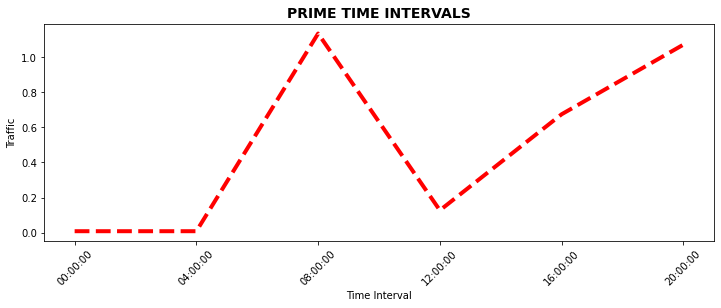

In [66]:
df[["PREV_DATE", "PREV_ENTRIES"]] = (df
                                            .groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]]
                                            .shift(1))
df['PREV_EXITS']=(df
                                            .groupby(["C/A", "UNIT", "SCP", "STATION"])[["EXITS"]]
                                            .shift(1))
df["DAILY_ENTRIES"] = df.apply(daily_count_entrance, axis=1, max_counter=1000000);
df["DAILY_EXITS"] =df.apply(daily_count_exits, axis=1, max_counter=100000);
df['TRAFFIC']=df['DAILY_ENTRIES']+df['DAILY_EXITS']
df=df.set_index('DATETIME')
interval =df.groupby(pd.Grouper(freq='4H')).first()
interval_mean=interval.groupby('TIME')['TRAFFIC'].mean().reset_index()

plt.figure(figsize=(12, 4))
plt.plot(interval_mean['TIME'], interval_mean['TRAFFIC'],'r--',linewidth=4)
plt.ylabel('Traffic')
plt.xlabel('Time Interval')
plt.xticks(rotation=45)
plt.title('PRIME TIME INTERVALS',fontweight="bold",fontsize=14)

In [67]:
L=[]
L=station_totals['STATION'].head(50)
filtered_data = pd.DataFrame()


In [68]:
#Create a df that contains all data from taurnstile_daily PERTAINING ONLY to the top 50 stations

for i in L:
    df_filtered = turnstiles_daily[turnstiles_daily['STATION'] == i]
    filtered_data=filtered_data.append(df_filtered)
    
filtered_data.drop(columns=['PREV_DATE','PREV_ENTRIES','ENTRIES'],inplace = True)
#filtered_data.head()
filtered_data.STATION.nunique()


50

In [69]:
filtered_data.to_csv('filtered_data.csv')
#filtered_data export to find zip codes for the stations

In [71]:
#CREATING NEW DF called DATA WITH ZIP CODE pertaining to the 50 station filtered_data df above
ZipCode=pd.read_csv("Zip_code.csv")
ZipCode=ZipCode.drop(['Unnamed: 0'],axis = 1)
ZipCode.rename(columns = {"station":"STATION","zip_code": "zip"}, inplace = True)
ZipCode.STATION.count()
ZipCode.head()

,STATION,zip
0,34 ST-PENN STA,10001
1,GRD CNTRL-42 ST,10017
2,34 ST-HERALD SQ,10017
3,23 ST,10011
4,14 ST-UNION SQ,10003


In [72]:
#create a new df filtered_data that contains all data from filtered_data df along witht their corresponding zip codes
filtered_data = pd.merge(filtered_data,ZipCode, on ="STATION")
#data.head()
#filtered_data['STATION'].nunique()
#dfiltered_data['STATION'].value_counts()
#filtered_data['zip'].isna().unique().sum()
#filtered_data.head()

In [73]:
#import neighborhood names for the zip codes in the filtered_data df
#https://data.beta.nyc/dataset/pediacities-nyc-neighborhoods
neighborhood = pd.read_csv("neighborhood.csv",usecols = ["zip","neighborhood","density"])
neighborhood

,zip,neighborhood,density
0,10001,Chelsea and Clinton,33959
1,10002,Lower East Side,92573
2,10003,Lower East Side,97188
3,10004,Lower Manhattan,5519
4,10005,Lower Manhattan,97048
...,...,...,...
172,11691,Rockaways,21185
173,11692,Rockaways,18566
174,11693,Rockaways,11950
175,11694,Rockaways,14944


In [74]:
# new filtered data df that contains neighborhoods as wellf or all the top 50 stations
filtered_data= pd.merge(filtered_data,neighborhood,on='zip')
filtered_data

,C/A,UNIT,SCP,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC,DAY,zip,neighborhood,density
0,N067,R012,00-00-00,34 ST-PENN STA,02/24/2019,279.0,844.0,1123.0,Sunday,10001,Chelsea and Clinton,33959
1,N067,R012,00-00-00,34 ST-PENN STA,02/25/2019,713.0,2289.0,3002.0,Monday,10001,Chelsea and Clinton,33959
2,N067,R012,00-00-00,34 ST-PENN STA,02/26/2019,740.0,2099.0,2839.0,Tuesday,10001,Chelsea and Clinton,33959
3,N067,R012,00-00-00,34 ST-PENN STA,02/27/2019,466.0,1261.0,1727.0,Wednesday,10001,Chelsea and Clinton,33959
4,N067,R012,00-00-00,34 ST-PENN STA,02/28/2019,670.0,3012.0,3682.0,Thursday,10001,Chelsea and Clinton,33959
...,...,...,...,...,...,...,...,...,...,...,...,...
195408,N519A,R461,01-06-01,B'WAY-LAFAYETTE,06/24/2019,1229.0,582.0,1811.0,Monday,10012,Greenwich Village and Soho,74517
195409,N519A,R461,01-06-01,B'WAY-LAFAYETTE,06/25/2019,1226.0,588.0,1814.0,Tuesday,10012,Greenwich Village and Soho,74517
195410,N519A,R461,01-06-01,B'WAY-LAFAYETTE,06/26/2019,1328.0,526.0,1854.0,Wednesday,10012,Greenwich Village and Soho,74517
195411,N519A,R461,01-06-01,B'WAY-LAFAYETTE,06/27/2019,1301.0,539.0,1840.0,Thursday,10012,Greenwich Village and Soho,74517


In [ ]:
#filtered_data.to_csv("filtered.csv")

In [75]:
filtered_data['zip'].isna().unique().sum()

0

In [76]:
filtered_data['neighborhood'].unique()

array(['Chelsea and Clinton', 'Gramercy Park and Murray Hill',
       'Lower East Side', 'Lower Manhattan', 'Upper East Side',
       'East Harlem', 'Greenwich Village and Soho', 'Upper West Side',
       'Sunset Park', 'North Queens', 'West Queens', 'Northwest Brooklyn',
       'Inwood and Washington Heights', 'Flatbush'], dtype=object)

In [77]:
filtered_data.groupby(['neighborhood','STATION'])[['TRAFFIC']].sum().reset_index().sort_values('TRAFFIC',ascending=False)

,neighborhood,STATION,TRAFFIC
3,Chelsea and Clinton,34 ST-PENN STA,36298594.0
13,Gramercy Park and Murray Hill,GRD CNTRL-42 ST,31090327.0
12,Gramercy Park and Murray Hill,34 ST-HERALD SQ,26458959.0
1,Chelsea and Clinton,23 ST,22474238.0
19,Lower East Side,14 ST-UNION SQ,22127794.0
7,Chelsea and Clinton,TIMES SQ-42 ST,22120187.0
21,Lower Manhattan,42 ST-PORT AUTH,20976675.0
24,Lower Manhattan,FULTON ST,19231122.0
34,Upper East Side,86 ST,18175543.0
10,East Harlem,125 ST,16150555.0


In [78]:
filtered_data.groupby('neighborhood')['density'].sum().reset_index().sort_values('density',ascending=False)


,neighborhood,density
0,Chelsea and Clinton,2752567428
7,Lower Manhattan,2054023854
11,Upper East Side,1669684987
12,Upper West Side,1637264130
3,Gramercy Park and Murray Hill,1061562822
4,Greenwich Village and Soho,689358690
6,Lower East Side,638515514
9,Northwest Brooklyn,568798830
10,Sunset Park,363476811
2,Flatbush,363467850


In [ ]:
#(filtered_data[filtered_data['neighborhood'] == "Chelsea and Clinton"] ).shape

In [ ]:
#(filtered_data[filtered_data['neighborhood'] == "Sunset Park"] ).shape

In [79]:
a=filtered_data[filtered_data['neighborhood'] == "Sunset Park"] 
b=filtered_data[filtered_data['neighborhood'] == "Chelsea and Clinton"]
c=filtered_data[filtered_data['neighborhood'] == "Lower Manhattan"]
d=filtered_data[filtered_data['neighborhood'] == "Upper East Side"]
e=filtered_data[filtered_data['neighborhood'] == "Gramercy Park and Murray Hill"]
         

In [80]:
filtered_df=pd.concat([a,b,c,d,e])
filtered_df.neighborhood.nunique()

5

In [81]:
filtered_df

,C/A,UNIT,SCP,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC,DAY,zip,neighborhood,density
128729,A002,R051,02-00-00,59 ST,02/24/2019,419.0,167.0,586.0,Sunday,11220,Sunset Park,55603
128730,A002,R051,02-00-00,59 ST,02/25/2019,1352.0,526.0,1878.0,Monday,11220,Sunset Park,55603
128731,A002,R051,02-00-00,59 ST,02/26/2019,1158.0,512.0,1670.0,Tuesday,11220,Sunset Park,55603
128732,A002,R051,02-00-00,59 ST,02/27/2019,1586.0,598.0,2184.0,Wednesday,11220,Sunset Park,55603
128733,A002,R051,02-00-00,59 ST,02/28/2019,1391.0,536.0,1927.0,Thursday,11220,Sunset Park,55603
...,...,...,...,...,...,...,...,...,...,...,...,...
163075,N306,R017,00-06-01,LEXINGTON AV/53,06/24/2019,0.0,2456.0,2456.0,Monday,10022,Gramercy Park and Murray Hill,73158
163076,N306,R017,00-06-01,LEXINGTON AV/53,06/25/2019,0.0,2801.0,2801.0,Tuesday,10022,Gramercy Park and Murray Hill,73158
163077,N306,R017,00-06-01,LEXINGTON AV/53,06/26/2019,0.0,2646.0,2646.0,Wednesday,10022,Gramercy Park and Murray Hill,73158
163078,N306,R017,00-06-01,LEXINGTON AV/53,06/27/2019,0.0,2488.0,2488.0,Thursday,10022,Gramercy Park and Murray Hill,73158


## For all the selected data we try to find specific turnstiels and geolocations 

In [82]:
geo = pd.read_csv("https://raw.githubusercontent.com/chriswhong/nycturnstiles/master/geocoded.csv", header=None, names=['UNIT','C/A', 'STATION', 'Station ID', 'Division', 'Latitute', 'Longitude'])

In [ ]:
#(geo['STATION']).unique()


In [83]:
n=[]
for i in list(filtered_df['STATION']):
    if i not in list(geo['STATION']):
        if i not in n:
            n.append(i)
    else:
        pass;
n

['TIMES SQ-42 ST',
 '7 AV',
 '42 ST-PORT AUTH',
 'PATH NEW WTC',
 '72 ST-2 AVE',
 'GRD CNTRL-42 ST',
 'LEXINGTON AV/53']

In [84]:
for i in range(len(n)):
    geonames=["42 ST-TIMES SQ","7 AVE","42 ST-PA BUS TE","PATH WTC","72 ST","42 ST-GRD CNTRL","LEXINGTON-53 ST"]
    #,"59 ST-COLUMBUS","WORLD TRADE CTR","47-50 ST-ROCK","MAIN ST",'ROOSEVELT AVE','ATLANTIC AVE','LEXINGTON AVE','7 AVE-53 ST'
    geo.replace(geonames[i],n[i], inplace = True)
final_df=geo.merge(filtered_df, on=["C/A", "UNIT","STATION"])
#g.count()
#g.STATION.nunique()
#filtered_data.count()
#filtered_data.STATION.nunique()

In [85]:
final_df

,UNIT,C/A,STATION,Station ID,Division,Latitute,Longitude,SCP,DATE,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC,DAY,zip,neighborhood,density
0,R215,C025,86 ST,R,BMT,40.622715,-74.028368,00-00-00,02/24/2019,828.0,369.0,1197.0,Sunday,10028,Upper East Side,143683
1,R215,C025,86 ST,R,BMT,40.622715,-74.028368,00-00-00,02/25/2019,2036.0,645.0,2681.0,Monday,10028,Upper East Side,143683
2,R215,C025,86 ST,R,BMT,40.622715,-74.028368,00-00-00,02/26/2019,2143.0,718.0,2861.0,Tuesday,10028,Upper East Side,143683
3,R215,C025,86 ST,R,BMT,40.622715,-74.028368,00-00-00,02/27/2019,2140.0,712.0,2852.0,Wednesday,10028,Upper East Side,143683
4,R215,C025,86 ST,R,BMT,40.622715,-74.028368,00-00-00,02/28/2019,2089.0,713.0,2802.0,Thursday,10028,Upper East Side,143683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105051,R179,R249,86 ST,456,IRT,40.779485,-73.955541,01-00-09,06/26/2019,578.0,7778.0,8356.0,Wednesday,10028,Upper East Side,143683
105052,R179,R249,86 ST,456,IRT,40.779485,-73.955541,01-00-09,06/27/2019,665.0,7904.0,8569.0,Thursday,10028,Upper East Side,143683
105053,R179,R249,86 ST,456,IRT,40.779485,-73.955541,01-00-09,06/28/2019,656.0,7791.0,8447.0,Friday,10028,Upper East Side,143683
105054,R179,R249,86 ST,456,IRT,40.779485,-73.955541,01-05-00,06/28/2019,1.0,0.0,1.0,Friday,10028,Upper East Side,143683


In [89]:
k=final_df.groupby(["STATION","C/A","UNIT"])[['TRAFFIC']].sum().reset_index().sort_values('TRAFFIC',ascending=False)
#k[k['STATION']=="34 ST-PENN STA"]
k.head(10)

,STATION,C/A,UNIT,TRAFFIC
85,GRD CNTRL-42 ST,R238,R046,9591189.0
31,34 ST-PENN STA,R138,R293,8577854.0
20,34 ST-HERALD SQ,N506,R022,7507920.0
42,42 ST-PORT AUTH,N063A,R011,7139255.0
18,34 ST-HERALD SQ,A025,R023,6838765.0
87,GRD CNTRL-42 ST,R240,R047,6299242.0
99,W 4 ST-WASH SQ,N083,R138,6258142.0
97,TIMES SQ-42 ST,R151,R033,5823196.0
65,86 ST,R249,R179,5295848.0
22,34 ST-PENN STA,N067,R012,5268113.0


# Within the selected top traffic stations, we have selected neighborhoods that partain to the objective and the above list are the turnstile clusters with highest volume of traffic.

In [ ]:

#import geopandas


gdf = geopandas.GeoDataFrame(
    final_df, geometry=geopandas.points_from_xy(final_df.Latitute, final_df.Longitude))

In [ ]:
final_df = gdf


In [ ]:
final_df.to_csv("finito.csv")

In [ ]:
#make it better by bigges sample of the time interval
#donation history
#educatioin
#social causes
#tech industry

In [ ]:
'''




        
        
        
        
        
        
        
from fuzzywuzzy import fuzz
from fuzzywuzzy import processmta_geo
['name_from_df2'] = mta_geo['Station Name'].apply(lambda x: process.extractOne
                                                         (x, filtered_data['STATION'].to_list(),score_cutoff=80))
        
data[['Station Name','copied_names']]
copied_names= data['copied_names'].to_list()
copied_names = [_[0] if _ != None else None for _ in copied_names]
data['name_from_df2'] = copied_names
#https://pythoninoffice.com/use-fuzzy-string-matching-in-pandas/

import pandas as pd
import geopandas
import matplotlib.pyplot as plt
geopandas.GeoDataFrame(
    g, geometry=geopandas.points_from_xy(g.Longitude, g.Latitute))
gdf = gdf.set_index("geometry")
gdf

 '''